Import necessary packages.

In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from scipy import stats
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to C:\Users\Arjuna
[nltk_data]     Bazaz\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Outputs a graph of which nation tweets were coming from during the period from October 21st through 23rd. Only included nations with more than 20 tweets. Uses a log scale in order to visualize the difference more clearly.

Average number of likes: 5.4704364344512015
Average number of retweets: 1.5707876847349493
Average number of user followers: 21079.957419863564
Total Number of Countries With Tweets Gathered: 159


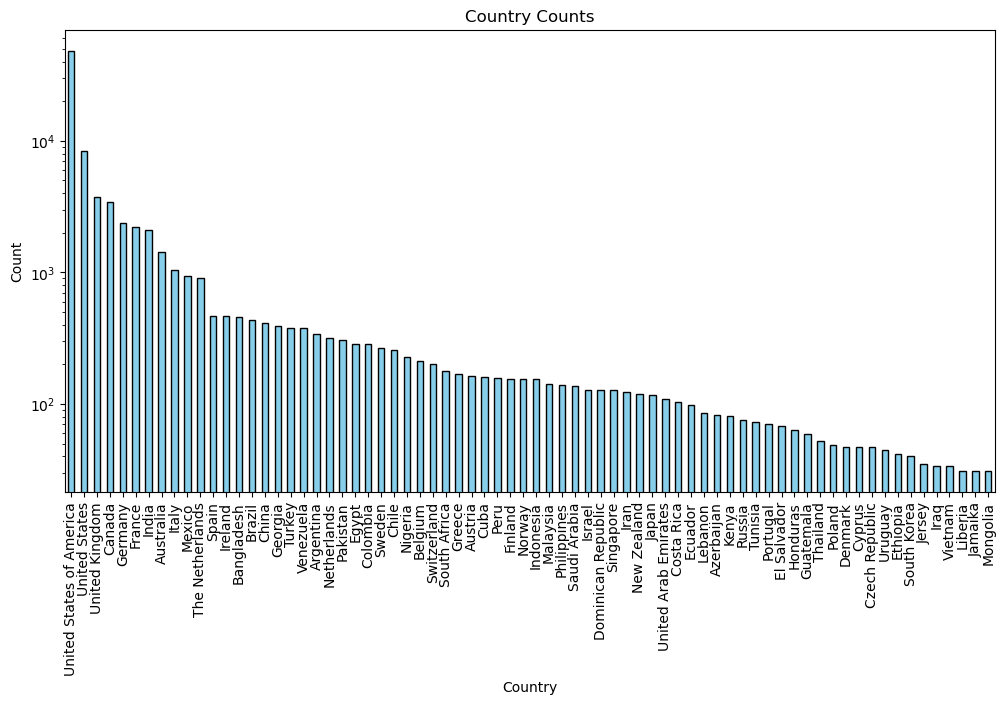

In [4]:
df = pd.read_csv("..\DATA\debate_tweets_cleaned.csv")

print("Average number of likes:", sum(df['likes'])/len(df))

print("Average number of retweets:", sum(df['retweet_count'])/len(df))

print("Average number of user followers:", sum(df['user_followers_count'])/len(df))

country_counts = df['country'].value_counts()
print("Total Number of Countries With Tweets Gathered:", len(country_counts))
country_counts = country_counts[country_counts > 30]

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Counts')
plt.xticks(rotation=90)
plt.show()

Outputs a graph of which states tweets were coming from during the period from October 21st through 23rd.

Total Number of States With Tweets Gathered: 53


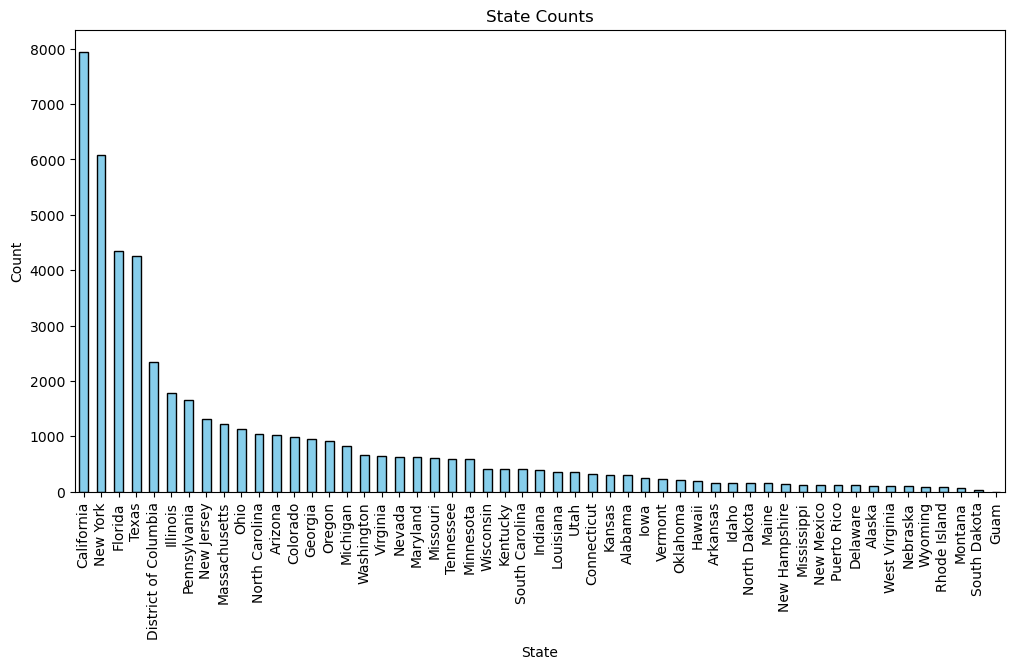

In [5]:
df = pd.read_csv("..\DATA\debate_tweets_cleaned.csv")

state_counts = df[df['country'].str.contains('United States', case=False, na=False)]['state'].value_counts()
print("Total Number of States With Tweets Gathered:", len(state_counts))

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Counts')
plt.xticks(rotation=90)
plt.show()

Graph showing which candidate got more likes on tweets about them during the period of October 21st - October 23rd. The dataset had no indication of how controlled it was, so this is solely basic exploration, and shouldn't used to draw conclusions.

about
trump    91937
biden    75465
Name: count, dtype: int64
4.8946778772420245 6.171867753263102


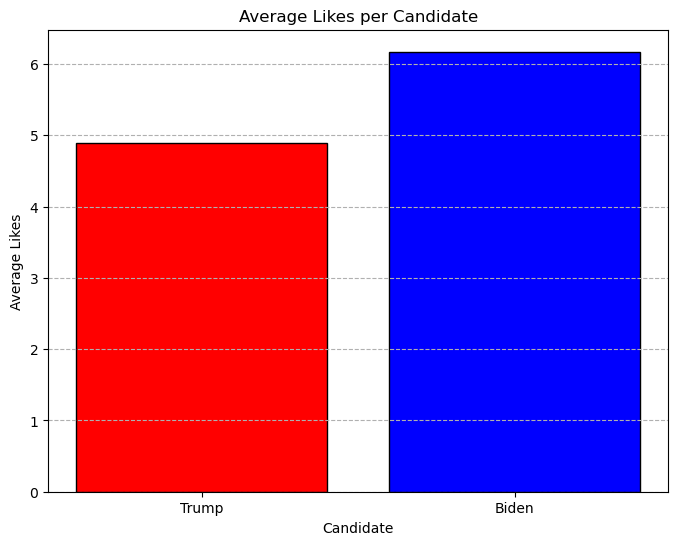

In [6]:
df = pd.read_csv("..\DATA\debate_tweets_cleaned.csv")

country_counts = df['about'].value_counts()
print(country_counts)

filtered_df_trump = df[df['about'] == 'trump']
filtered_df_biden = df[df['about'] == 'biden']

mean_value_trump = filtered_df_trump['likes'].mean()
mean_value_biden = filtered_df_biden['likes'].mean()

print(mean_value_trump, mean_value_biden)

candidates = ['Trump', 'Biden']
means = [mean_value_trump, mean_value_biden]

plt.figure(figsize=(8, 6))
plt.bar(candidates, means, capsize=10, color=['red', 'blue'], edgecolor='black')

plt.xlabel('Candidate')
plt.ylabel('Average Likes')
plt.title('Average Likes per Candidate')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()